# Visualising FITS and star positions

## Import modules

In [2]:
import requests, math, glob
import pandas as pd
import numpy as np
from photutils import DAOStarFinder
from astropy.stats import mad_std
from astropy.io import fits
from astropy.coordinates import SkyCoord
from astropy.coordinates import match_coordinates_sky
from astropy.wcs import WCS
import astropy.units as u
from astropy.coordinates import Angle
import matplotlib.pyplot as 
from photutils import aperture_photometry, CircularAperture
#from astroquery.simbad import Simbad
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

import os
os.chdir('/home/jovyan/work/src')

%matplotlib inline
plt.style.use('seaborn')
pd.options.mode.chained_assignment = None
%load_ext autoreload
%autoreload 2

## Set reference frame, global vars

In [11]:
wcs_file = '../results/WWCrA#30V_000452143_FLAT.fit'
FITS_FILE= wcs_file
PADDING = 200


In [8]:
def getWcs(wcs_file):
    hdulist = fits.open(wcs_file)
    data = hdulist[0].data.astype(float)
    header = hdulist[0].header
    wcs = WCS(header)
    return wcs

wcs = getWcs(wcs_file)



In [9]:
print(wcs)
for star in vsx_star_descr:
    print(star.coords, star.match[0].coords)
    thematch = star.match[0]
    #star.coords = star.match[0].coords
    #print("jupyter:", star.coords)
    #print("python:", star.local_id, star.coords, star.match[0])
    print(f'Catalog:{thematch.name_of_catalog}, CatalogId:{thematch.catalog_id}, Name:{thematch.name}, Coords:{thematch.coords}, Separation:{thematch.separation}')

WCS Transformation

This transformation has 2 pixel and 2 world dimensions

Array shape (Numpy order): (1365, 1365)

Pixel Dim  Data size  Bounds
        0       1365  None
        1       1365  None

World Dim  Physical Type  Units
        0  None           unknown
        1  None           unknown

Correlation between pixel and world axes:

           Pixel Dim
World Dim    0    1
        0  yes   no
        1   no  yes


NameError: name 'vsx_star_descr' is not defined

## Get comparison Star

In [5]:
comparison_star_descr = do_calibration.get_star_descriptions([reading.read_comparison_star()])
center_coord = SkyCoord.from_pixel(wcs._naxis1/2.0, wcs._naxis2/2.0, wcs)
apass_star_descr = do_calibration.get_apass_star_descriptions(center_coord, Angle(0.67, unit=u.deg), row_limit=10000)
print(len(apass_star_descr))

Reference star: 104, Aperture: 8

Reading star descriptions for: [104]
5094


In [6]:

def set_local_id_label(star_descriptions):
    for star_descr in star_descriptions:
        star_descr.label = star_descr.local_id
    return star_descriptions

def set_aavso_id_label(star_descriptions):
    for star_descr in star_descriptions:
        star_descr.label = star_descr.aavso_id
    return star_descriptions

def set_custom_label(star_descriptions, label):
    for index, star_descr in enumerate(star_descriptions):
        star_descr.label = label if isinstance(label, list) else label[index]
    return star_descriptions

def add_pixels(results, offset):
    for star in results:
        star_coord = star.coords
        xy = SkyCoord.to_pixel(star_coord, wcs=wcs, origin=0)
        x = xy[0].item(0)
        y = xy[1].item(0)
        star.xpos = x + offset
        star.ypos = y + offset
    return results

big_green = set_custom_label(comparison_star_descr, 'comp')
# small_red = set_custom_label(apass_star_descr, [o.vmag for o in apass_star_descr])
# big_green = set_custom_label(vsx_star_descr, [o.match['catalog_dict']['name'] for o in vsx_star_descr])
# small_red = set_custom_label(hand_candidates_descr, [o.local_id for o in hand_candidates_descr])
big_green = set_aavso_id_label(vsx_star_descr)
small_red = set_local_id_label(hand_candidates_descr)

big_green = add_pixels(big_green, PADDING)
small_red = add_pixels(small_red, PADDING)
print("nr of found result:", len(big_green), len(small_red))

nr of found result: 19 19


../results/WWCrA#30V_000452143_FLAT.fit


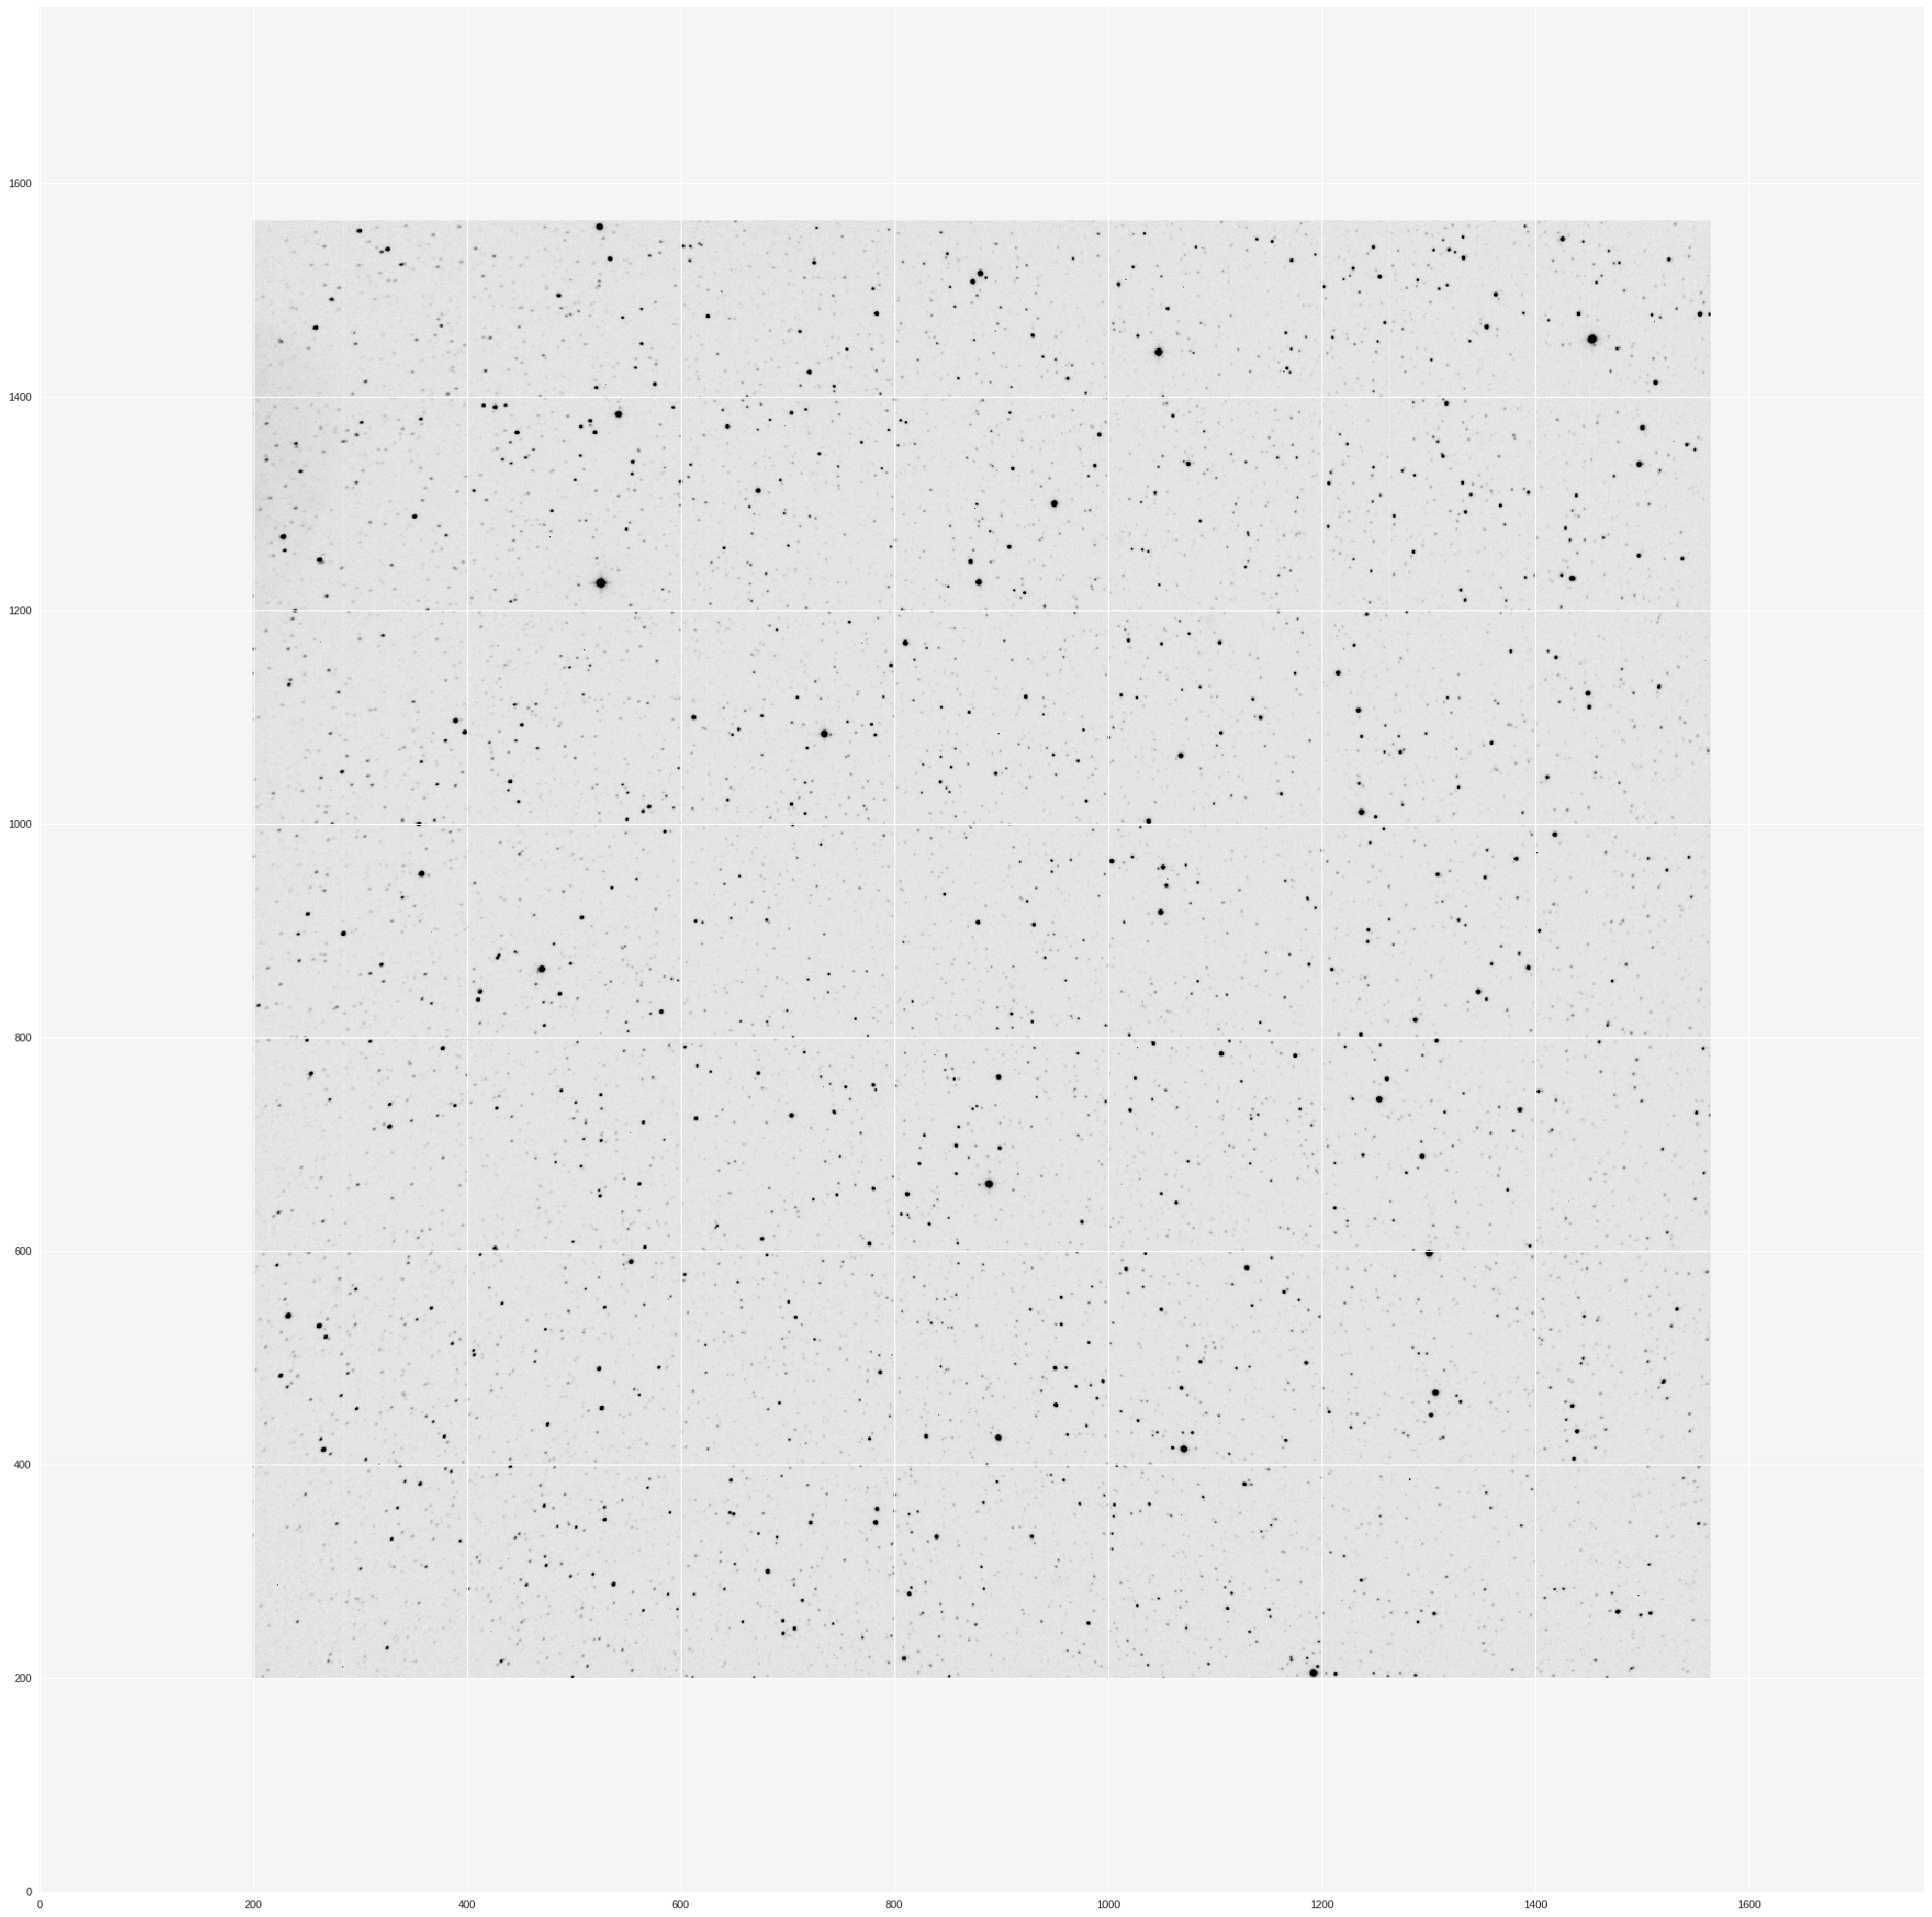

In [15]:
print(FITS_FILE)
hdulist = fits.open(FITS_FILE)
data = hdulist[0].data.astype(float)

data = np.pad(data, (PADDING,PADDING), 'constant', constant_values=(100, 100))
fig=plt.figure(figsize=(36, 32), dpi= 80, facecolor='w', edgecolor='k')
# target_app = CircularAperture(target_xy, r=20.)    
plt.imshow(data, cmap='gray_r', origin='lower', vmin=0, vmax=2500)


../results/WWCrA#30V_000452143_FLAT.fit


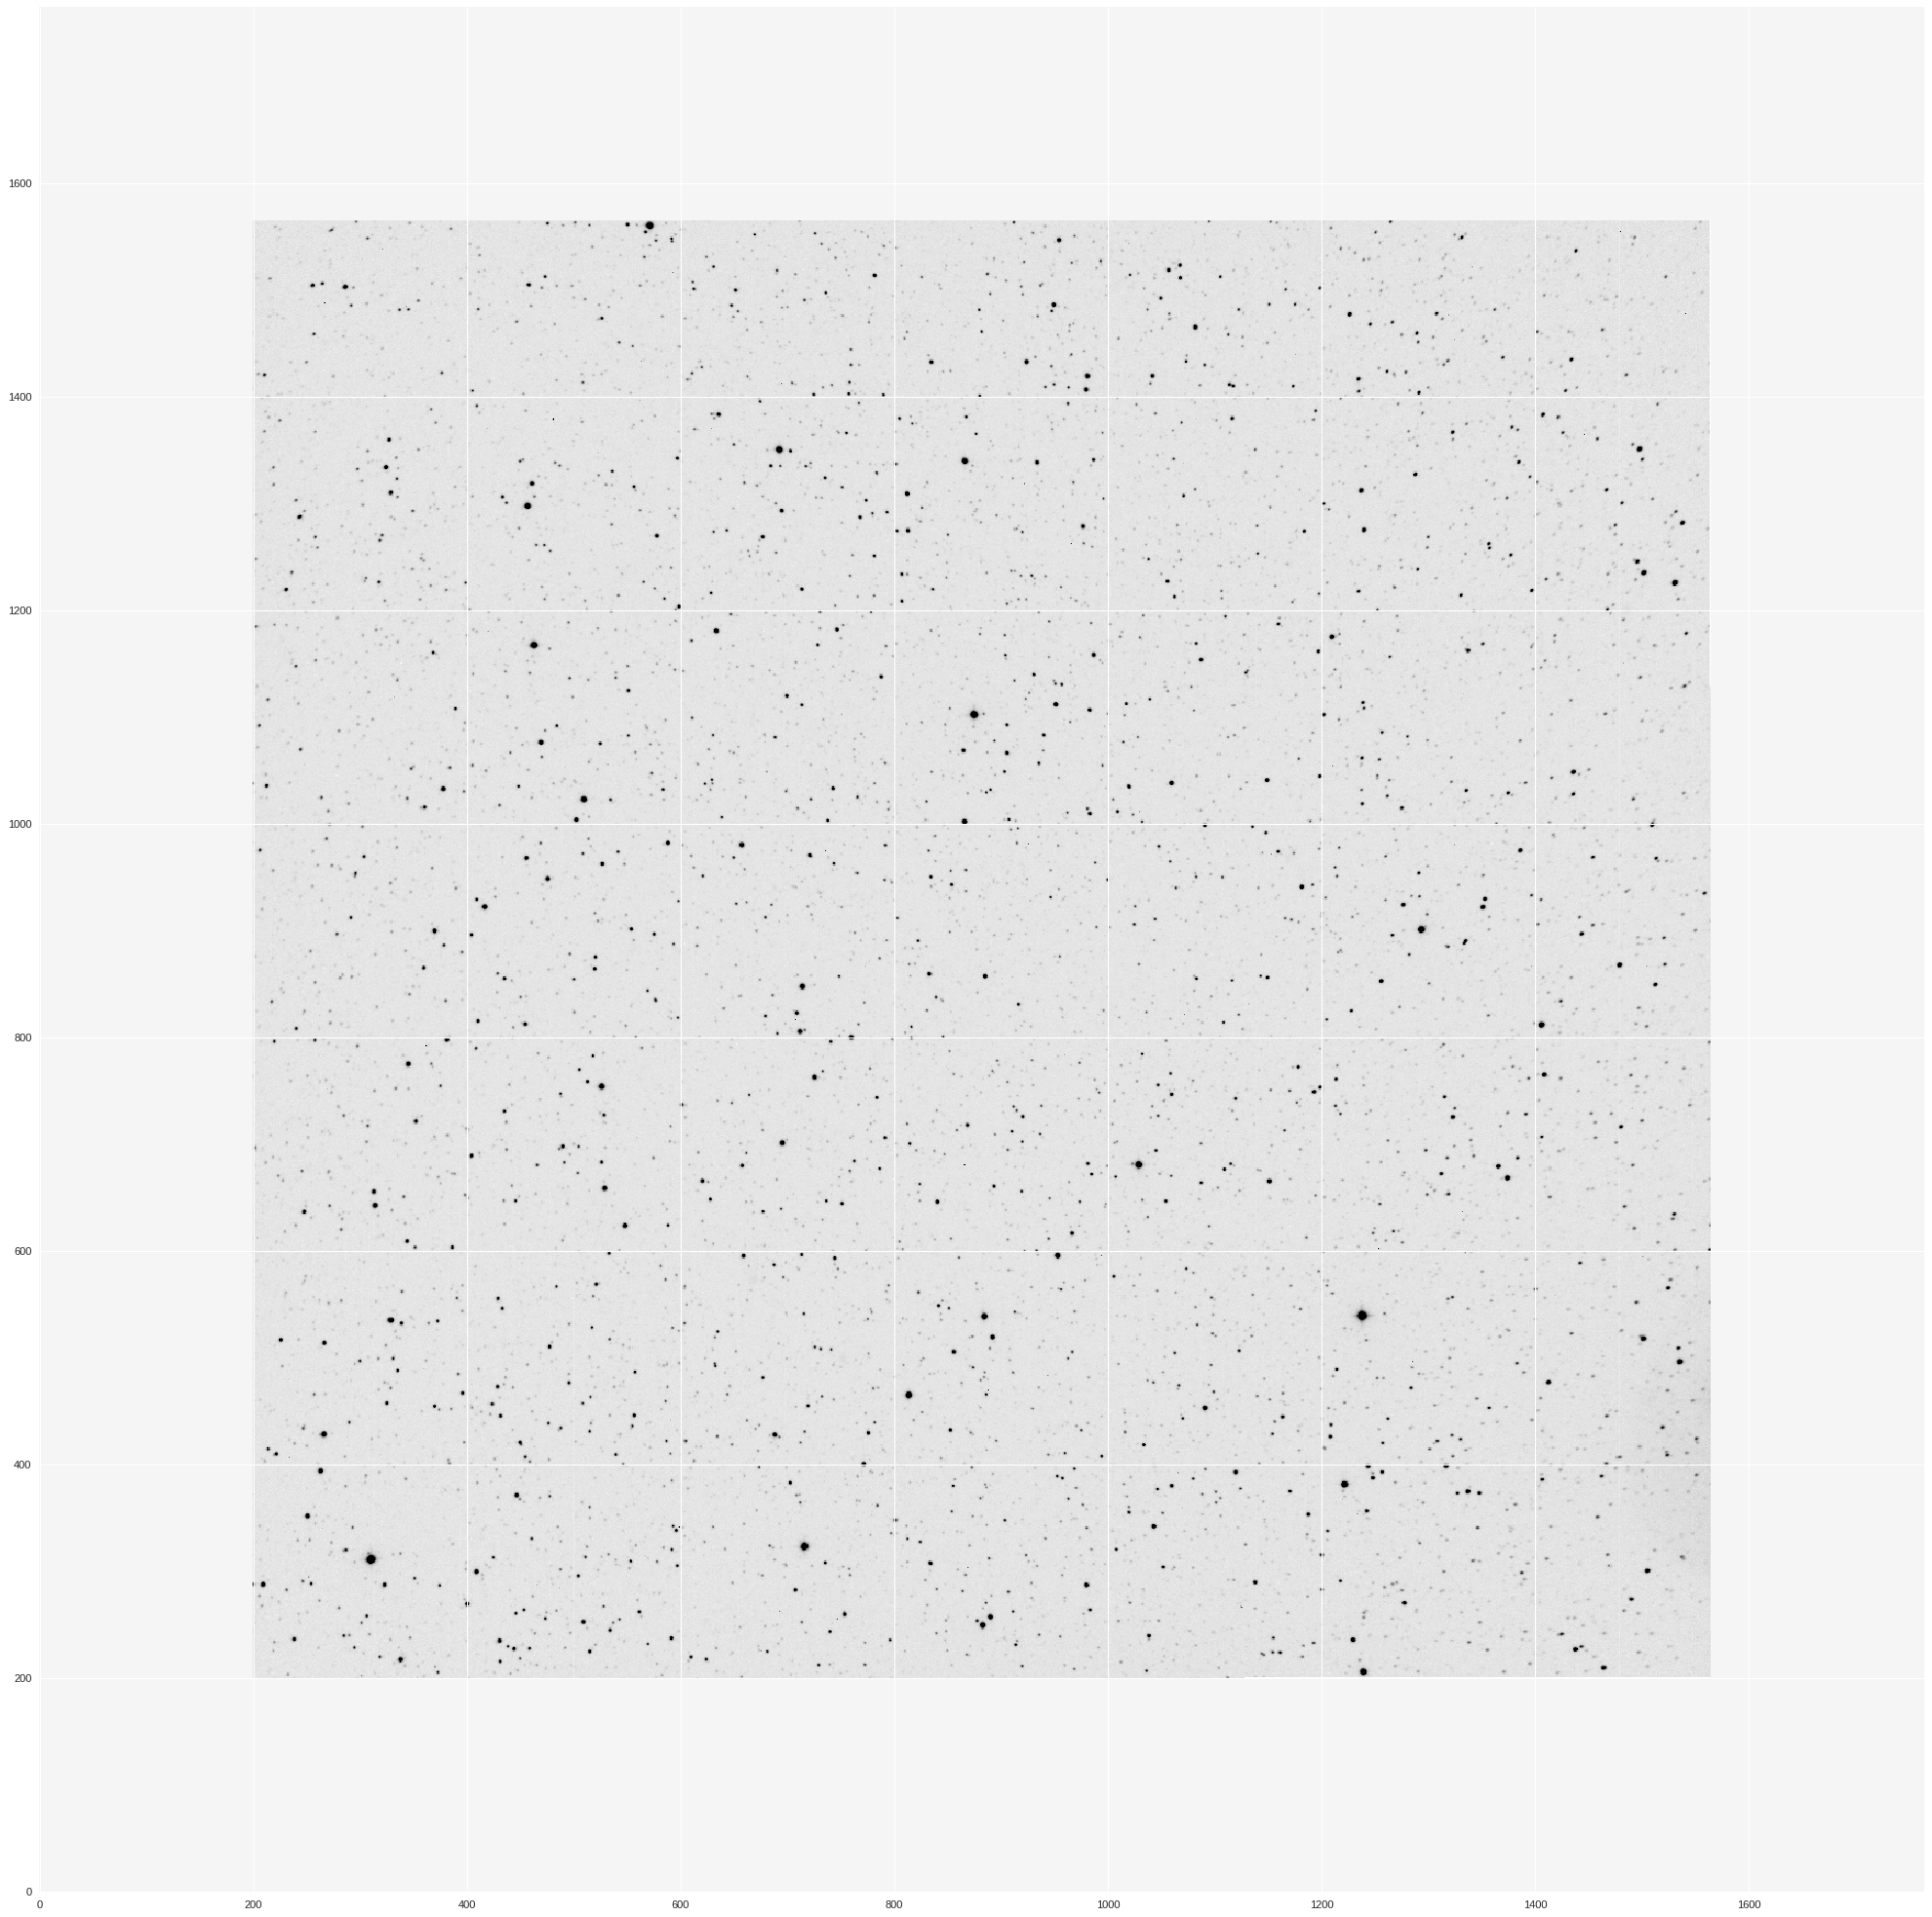

In [17]:
from scipy import ndimage

print(FITS_FILE)
hdulist = fits.open(FITS_FILE)
data = hdulist[0].data.astype(float)
data = ndimage.interpolation.rotate(data, 180)

data = np.pad(data, (PADDING,PADDING), 'constant', constant_values=(100, 100))
fig=plt.figure(figsize=(36, 32), dpi= 80, facecolor='w', edgecolor='k')
# target_app = CircularAperture(target_xy, r=20.)    
plt.imshow(data, cmap='gray_r', origin='lower', vmin=0, vmax=2500)


## Save the image

In [ ]:
fig.savefig(init.basedir+'known_vs_found_10k')
plt.close(fig)